In [1]:
import collections
import pathlib
import random


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [ ]:
user_profile = pd.read_csv('complete_user_profile.csv')
user_profile.head()
# Remove user_id to allow for PCA 
user_profile_no_id = user_profile.loc[:, 'order_dow':]

## Perform PCA Analysis to reduce to 2 dimensions 

In [6]:
from sklearn.decomposition import PCA 

# perform PCA using 2 components 
pca = PCA(n_components = 2).fit(user_profile_no_id)
pca_2d = pca.transform(user_profile_no_id)
pca_df = pd.DataFrame(pca_2d)

In [7]:
# PCA performed well 
str(pca.explained_variance_ratio_)

'[0.939523 0.045527]'

## Perform Kmeans clustering

### Use within sum of squares (inertia) to calculate number of clusters 

In [8]:
from sklearn.cluster import KMeans

In [9]:
inertia_list = []
random_state = 123

k_range = range(5, 100, 5) # <- start at 5, go to 100, step size = 5
for k in k_range: 
    
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    #using post pca values
    kmeans = kmeans.fit(pca_df) # <- pca_df is the resulting df from PCA analysis
    u = kmeans.inertia_
    inertia_list.append(u)
    print("The inertia for :", k, "Clusters is:", u)

The inertia for : 5 Clusters is: 70416.44852088022
The inertia for : 10 Clusters is: 34350.85323835628
The inertia for : 15 Clusters is: 19363.13126400029
The inertia for : 20 Clusters is: 14313.204301113263
The inertia for : 25 Clusters is: 10406.430979634544
The inertia for : 30 Clusters is: 7284.764449826531
The inertia for : 35 Clusters is: 5650.674832115312
The inertia for : 40 Clusters is: 4506.936825233877
The inertia for : 45 Clusters is: 3543.6913247708185
The inertia for : 50 Clusters is: 2911.8912405900605
The inertia for : 55 Clusters is: 2396.87911437433
The inertia for : 60 Clusters is: 1839.4752604389257
The inertia for : 65 Clusters is: 1583.0021005015635
The inertia for : 70 Clusters is: 1298.7107026600422
The inertia for : 75 Clusters is: 1077.0504749578135
The inertia for : 80 Clusters is: 922.1207679244512
The inertia for : 85 Clusters is: 774.9808311049296
The inertia for : 90 Clusters is: 667.905393016798
The inertia for : 95 Clusters is: 576.8820391043228


### Graph the inertia results -- 'Elbow Method'

Text(0.5, 1.0, 'Inertia Plot per k')

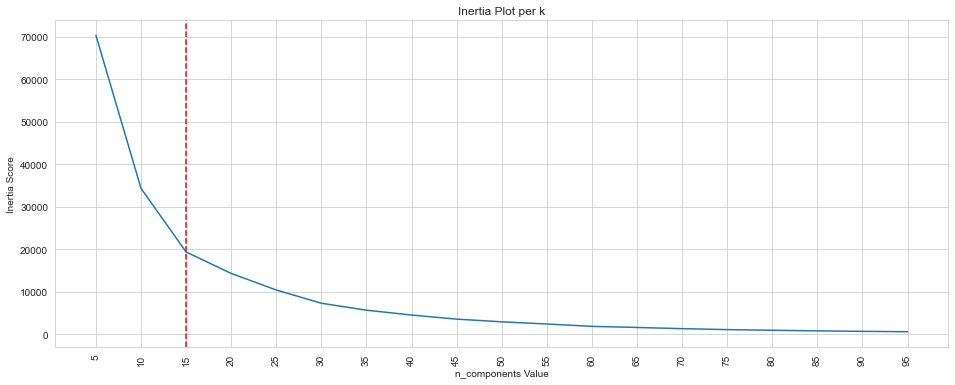

In [10]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(k_range))
ax1.plot(xx, inertia_list)
ax1.set_xticks(xx)
ax1.set_xticklabels(k_range, rotation='vertical')
plt.axvline(2, color = 'red', linestyle = 'dashed')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Rerun kmeans with 15 clusters 

In [11]:
k = 15


kmeans = KMeans(n_clusters=k, random_state=random_state)
kmeans = kmeans.fit(pca_df)


kmeans.labels_

# "predictions" for new data, which will assign clusters to our existing data
predictions = kmeans.predict(pca_df)

# calculating the Counts of the cluster and reformatting them to be put into a dataframe
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(k)

print(len(counts))
print('Average number of users in each cluster: ' + str(counts.mean()))

# Creating a datagrame 'counts for each cluster'
counts_df = pd.DataFrame(counts)

# display
# countscldf

15
Average number of users in each cluster: 15.266666666666667


In [12]:
cluster_names_dict = {
    'Cluster 1': counts[0],
    'Cluster 2': counts[1],
    'Cluster 3': counts[2],
    'Cluster 4': counts[3],
    'Cluster 5': counts[4],
    'Cluster 6': counts[5],
    'Cluster 7': counts[6],
    'Cluster 8': counts[7],
    'Cluster 9': counts[8],
    'Cluster 10': counts[9],
    'Cluster 11': counts[10],
    'Cluster 12': counts[11],
    'Cluster 13': counts[12],
    'Cluster 14': counts[13],
    'Cluster 15': counts[14]
}

In [13]:
target_names = list(cluster_names_dict.keys())

## Plotting the Clusters

<Figure size 432x288 with 0 Axes>

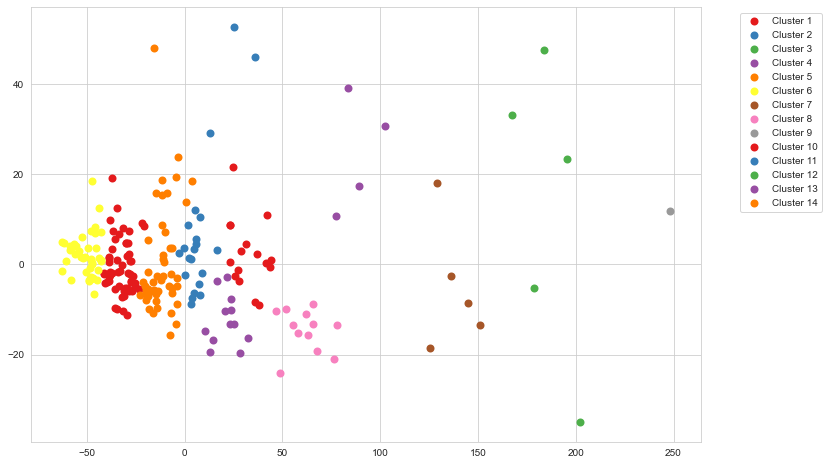

In [14]:
y_num = predictions

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
# colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2
colors = sns.color_palette("Set1", k)

# Get the x and y coordinates from the pca_df 
pca_df_0 = pd.Series(pca_df[0])
pca_df_1 = pd.Series(pca_df[1])

# colors is a list of our color names 
# i is the number of clusters we have
# Target names is our list of clusters
for color, i, target_name in zip(colors, range(1,15,1), target_names):

#         we are plotting our pca_df values (transformed to 2 components), y_num is our cluster and assign it 0, 1 where 0 = x axis, 1 = y axis
    plt.scatter(pca_df_0[y_num == i], pca_df_1[y_num == i], color=color, alpha=1, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
# plt.title('PCA of 74 Items')
plt.show()

# Visualize Cluster Info

In [54]:
user_profiles = pd.read_csv('complete_user_profile.csv')
user_profiles.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_orders,num_products,avg_num_products_per_order,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,vector_10
0,1,2.644068,10.542373,20.259259,10,18,1.800000,0.128626,-0.071086,-0.094930,0.339864,0.257313,-0.063641,-0.016998,-0.261062,-0.284597,0.073446
1,2,2.005128,10.441026,15.967033,14,102,7.285714,0.147047,-0.140073,-0.101226,0.394054,0.254744,0.002005,0.137818,-0.227310,-0.392329,0.014213
2,3,1.011364,16.352273,11.487179,12,33,2.750000,0.158350,-0.082591,-0.101315,0.400028,0.256358,-0.005024,0.071992,-0.206902,-0.320576,0.093902
3,4,4.722222,13.111111,15.357143,5,17,3.400000,0.136487,-0.087981,-0.190215,0.392855,0.258925,0.049131,0.072121,-0.268353,-0.457842,0.121416
4,5,1.621622,15.729730,14.500000,4,23,5.750000,0.148560,-0.064317,-0.081299,0.351855,0.229021,0.008345,0.046285,-0.270246,-0.448925,0.042516


In [55]:
user_cluster_dict = {}
for i in range(1, len(target_names)+1):
    user_cluster_dict[i] = target_names[i-1]
    

In [57]:
user_cluster_dict = {}
for i, target_name in zip(range(1,229,1), target_names):
    print(target_name)
    if(y_num[i] == 1):
        user_cluster_dict[i] = target_name
        
        

#         we are plotting our pca_df values (transformed to 2 components), y_num is our cluster and assign it 0, 1 where 0 = x axis, 1 = y axis
#     plt.scatter(pca_df_0[y_num == i], pca_df_1[y_num == i], color=color, alpha=1, lw=lw,label=target_name)

Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9
Cluster 10
Cluster 11
Cluster 12
Cluster 13
Cluster 14
Cluster 15


In [88]:
# add cluster coordianates to user_profile
temp_pca_df = pca_df
temp_pca_df.head()

,0,1
0,-45.363264,3.694647
1,37.923869,-9.105950
2,-29.880335,4.800765
3,-47.100093,0.324550
4,-41.353113,-2.057072


In [89]:
temp1_pca_df = temp_pca_df.rename(columns = {0: 'X_coor', 1: 'Y_coor'})

In [90]:
temp1_pca_df.head()

,X_coor,Y_coor
0,-45.363264,3.694647
1,37.923869,-9.105950
2,-29.880335,4.800765
3,-47.100093,0.324550
4,-41.353113,-2.057072


In [58]:
clusters = kmeans.labels_

# Attaching the clusters back to our initial Dataset that has all the data
user_profiles['Clusters'] = clusters


In [91]:
user_profiles['X_coor'] = temp1_pca_df['X_coor']
user_profiles.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_orders,num_products,avg_num_products_per_order,Clusters,X_coor
0,1,2.644068,10.542373,20.259259,10,18,1.800000,6,-45.363264
1,2,2.005128,10.441026,15.967033,14,102,7.285714,10,37.923869
2,3,1.011364,16.352273,11.487179,12,33,2.750000,1,-29.880335
3,4,4.722222,13.111111,15.357143,5,17,3.400000,6,-47.100093
4,5,1.621622,15.729730,14.500000,4,23,5.750000,1,-41.353113


In [92]:
user_profiles['Y_coor'] = temp1_pca_df['Y_coor']
user_profiles.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_orders,num_products,avg_num_products_per_order,Clusters,X_coor,Y_coor
0,1,2.644068,10.542373,20.259259,10,18,1.800000,6,-45.363264,3.694647
1,2,2.005128,10.441026,15.967033,14,102,7.285714,10,37.923869,-9.105950
2,3,1.011364,16.352273,11.487179,12,33,2.750000,1,-29.880335,4.800765
3,4,4.722222,13.111111,15.357143,5,17,3.400000,6,-47.100093,0.324550
4,5,1.621622,15.729730,14.500000,4,23,5.750000,1,-41.353113,-2.057072


In [175]:
user_profiles.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_orders,num_products,avg_num_products_per_order,Clusters,X_coor,Y_coor
0,1,2.644068,10.542373,20.259259,10,18,1.800000,6,-45.363264,3.694647
1,2,2.005128,10.441026,15.967033,14,102,7.285714,10,37.923869,-9.105950
2,3,1.011364,16.352273,11.487179,12,33,2.750000,1,-29.880335,4.800765
3,4,4.722222,13.111111,15.357143,5,17,3.400000,6,-47.100093,0.324550
4,5,1.621622,15.729730,14.500000,4,23,5.750000,1,-41.353113,-2.057072


In [176]:
# user_profiles.to_csv('./clustered_users.csv')

In [167]:
# Get a dataframe of just user_id and cluster
user_cluster = user_profiles[['user_id', 'Clusters']]
user_cluster.head()

,user_id,Clusters
0,1,6
1,2,10
2,3,1
3,4,6
4,5,1


In [160]:
# Add clusters to all_order_train
all_orders_train = pd.read_csv('all_orders_train.csv')
all_orders_train.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,2539329,196,1,0,Soda,77,7,1,1,2,8,NaN
1,1,2539329,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,1,1,2,8,NaN
2,2,2539329,12427,3,0,Original Beef Jerky,23,19,1,1,2,8,NaN
3,3,2539329,26088,4,0,Aged White Cheddar Popcorn,23,19,1,1,2,8,NaN
4,4,2539329,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1,1,2,8,NaN


In [161]:
all_orders_train.drop(columns='Unnamed: 0', inplace = True)

In [180]:
user_cluster.describe

<bound method NDFrame.describe of      user_id  Clusters
0          1         6
1          2        10
2          3         1
3          4         6
4          5         1
..       ...       ...
224      225         1
225      226         2
226      227         7
227      228         1
228      229        14

[229 rows x 2 columns]>

In [168]:
orders_by_cluster = pd.merge(all_orders_train, user_cluster, how = 'left', on = 'user_id')

In [173]:
# orders_by_cluster.to_csv('./all_data_by_clusters.csv')